# Regressão Linear Simples

## 🍨 Prevendo vendas de sorvetes com base na temperatura
Vamos utilizar uma base que contém dados sobre a temperatura do clima e as vendas de sorvete.
Será tem alguma relação entre essas features?

In [4]:
# Importando as bibliotecas necessárias
import pandas
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importando a base de dados
dados = pandas.read_excel("Sorvete.xlsx")
dados.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


Vamos plotar um gráfico para melhorar a visualização das vendas em relação à temperatura. Gráfico de scatter.

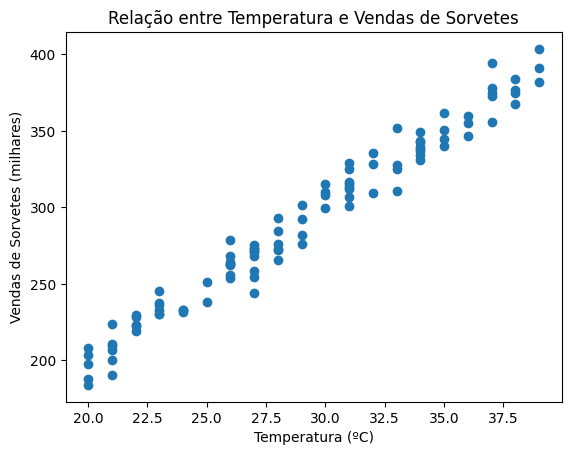

In [5]:
# Visualizando os dados com pyplot scatter
pyplot.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])

pyplot.xlabel('Temperatura (ºC)')
pyplot.ylabel('Vendas de Sorvetes (milhares)')
pyplot.title('Relação entre Temperatura e Vendas de Sorvetes')

pyplot.show()

Notável relação linear entre as duas variáveis.
As vendas tendem a aumentar quanto mais a temperatura aumentar. <br> <br>
Vamos analisar a correlação de ambas variáveis.

In [7]:
# Função para medir a correlação entre variáveis contínuas
dados.corr()

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


> *A correlação mede a força e a direção do relacionamento linear entre duas variáveis.*

Analisar a correlação entre as variáveis é uma boa estratégia ao criar um modelo de regressão linear simples.
Quanto mais próximo de 1, mais evidente é a correlação entre as variáveis.

## Criando o modelo de regressão

Vamos separar os dados em treino e teste, e em seguida construir o modelo preditivo utilizando a LinearRegression do Sklearn.






In [32]:
# Dividindo os dados em conjuntos de treinamento e teste
x = dados[['Temperatura']] # Recurso (variável independente)
y = dados['Vendas_Sorvetes'] # Rótulo (variável dependente)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# Tamanho da base de Treino (linhas, colunas)
x_train.shape

(80, 1)

In [34]:
# Tamanho da base de Teste (linhas, colunas)
x_test.shape

(20, 1)

In [35]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(x_test)

## Avaliação dos resultados

Vamos utilizar as seguintes métricas:

*   RMSE (raíz quadrada do MSE)
  * O Erro Quadrático Médio, ou *Mean Squared Error*, é a média dos quadrados das diferenças entre os valores reais e os previstos.
*   MAE
  * Erro Médio Absoluto, ou *Mean Squared Error*. Quanto menor o valor, mais próximas da realidade as previsões estão.
*   R-squared (R2)
  * Quanto mais próximo de 1, indica que o modelo explica uma maior proporção de variabilidade nos dados.
  * Uma das principais métricas de avaliação de um modelo de regressão.


Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Médio: 7.6809927436910055
R² (coeficiente de determinação): 0.9594169633031285


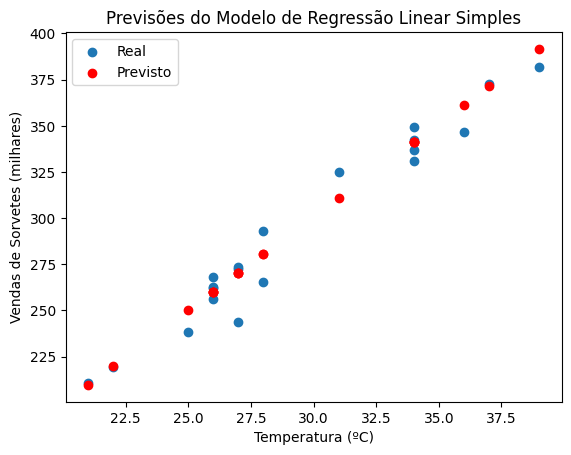

In [38]:
# Avaliando o desempenho do modelo
erro_quadratico_medio = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_quadratico_medio}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
pyplot.scatter(x_test, y_test, label='Real')
pyplot.scatter(x_test, previsoes, label='Previsto', color='red')
pyplot.xlabel('Temperatura (ºC)')
pyplot.ylabel('Vendas de Sorvetes (milhares)')
pyplot.title('Previsões do Modelo de Regressão Linear Simples')
pyplot.legend()
pyplot.show()